<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

The objective of this Jupyter Notebook is to introduce the topic of Natural Language Processing, discuss various libraries and models available and tasks that can be performed in NLP.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

import nltk # Natural Langage Toolkit
from nltk import word_tokenize, pos_tag # Tokenizer and Parts of Speech Tags
from nltk.tokenize import RegexpTokenizer # Tokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer # Lemmitization and Stemming
from nltk.corpus import stopwords, wordnet # Stopwords and POS tags
#nltk.download #(One time to download 'stopwords')
#nltk.download # (One time to download 'punkt')
#nltk.download #(One time to download 'averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer # Vectorization Functions
from sklearn.metrics import pairwise_distances # Cosine similarity

from IPython.display import Image, display, HTML, clear_output

In [2]:
pd.set_option('display.max_colwidth', None) # Allows to show all the column information in a DF.

# Table of Contents

[Natural Language Processing (NLP)](#Natural-Language-Processing-(NLP))

[Data](#Data)

- [Data Loading](#Data-Loading)

[Stopwords](#Stopwords)

- [SciKit-Learn Stopwords](#SciKit-Learn-Stopwords)

- [NLTK Stopwords](#NLTK-Stopwords)

- [Custom Stopwords](#Custom-Stopwords)

[Text Normalization Functions](#Text-Normalization-Functions)

[Bag of Words (BoW) Model](#Bag-of-Words-(BoW)-Model)

[References](#References)

# Natural Language Processing (NLP)
[Return to Table of Contents](#Table-of-Contents)

Natural Language Processing (NLP) refers to the process and data transformation that a system and algorithms performs to understand and extract meaning and insights from unstructured data (e.g., text, language, etc.). In data science and artificial intelligence, NLP can be used for various tasks including but not limited classification, clustering, recommendation, ranking, question answering, text summarization, and generative (e.g., given a prompt generate text, image, sound, and video). Note that in large language model (LLM) space, these tasks are called fine-tunning.

There are various methods and models that can be applied given the task. Some methods and models from simple to complex include:
- Bag of Words (BoW) model
- Word and Sentence Embeddings (e.g., word2Vec)
- Transformers (e.g., Google BERT, Hugging Face T5)
- Large Language Models (e.g., OpenAI ChatGPT)

The amount of data needed is highly variable and dependent on the task and method used. For example, the objective of similarity ranking is to compare the similarity between two bodies of text (e.g., two paragraphs) or perhaps a query. Similarity ranking can be used with as little as two records. 

Classification tasks (i.e., sentiment analysis, predicting text category such as email category) you will need enough records for each category (e.g., SPAM and HAM emails or positive/negative sentiment) for the model to be able to predict each category.

In generative-AI and LLMs the data requirements are so large that takes a extremely large processing capacity and millions of dollars just to train a model.

Porcessing of the data and implementation of the model also varies significantly based on the methods and model used and each has its own learning curve. There are various libraries available that can be used for NLP or various steps within NLP. Anaconda includes the following libraries that have NLP components:
- NLTK
- SciKit-Learn
- Gensim

The following NLP libraries, methods, and models that currently, as of December 2023, are not included in the Anaconda Distribution and have to be installed separately.
- spaCy
- TextBlob
- ScatterText
- Bert
- Hugging Face
- OpenAI ChatGPT

This notebook discusses the BoW model which is one of the simplest models used in NLP as well as othe processing steps such as normalization. Later notebooks will cover how to use the BoW model to calculate similarity to perform a query. Similarity ranking can be used for many things including modifying the code to calculate similarity between every other question or other types of text.

# Data
[Return to Table of Contents](#Table-of-Contents)

The example dataset is a helthcare related question and anser sets. The dataset has four columns: question, answer, source and focus_area. The question and/or answer columns can be processed and the text normalized.

The question or answer columns could be used for performing similarity ranking queries or calculations. The focus_area column could be used to classify new symptoms or qeustion into its corresponding area given the qeustion or answer.

This notebook will discuss how to perform natural language processing, text normalization, develop the bag of words (BoW) model token matrix. Further notebook will provide an example of how a similarity ranking query works. Note that the same BoW matrix can also be used to perform other types of tasks like classification and clustering.   

Source of dataset: https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles

### Data Loading

In [3]:
# Read dataframe.
df = pd.read_csv('./input_data/Articles.csv', 
                 encoding_errors= 'replace', # Resolves issues with encoding not allowing the file to be loaded.  
              encoding='latin1') # Resolves issues with encoding showing special characters.

# https://docs.python.org/3/library/codecs.html
# https://stackoverflow.com/questions/55563399/how-to-solve-unicodedecodeerror-utf-8-codec-cant-decode-byte-0xff-in-positio

In [4]:
df.head(3) 

Article  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Note that Article text in row index 1 has various words in itallics or other fonts. This is because Jupyter renders some special characteres (e.g., \\$) as itallics. Because of this the dollar sign, \\$  does not appears and may show the text rendered. To resolve there are a few options:
- Use the replace function to replace the special characters like the dollar sign \\$ with with its latex escape character in front of the character (i.e., two double slashes)
- Use the print function but will remove the Table formatting.
- Change the following option to false: "pd.options.display.html.use_mathjax = False".

However, note that even if this is not fixed, this only affects the rendering does not affect the actual text. If a column or feature had dollar values, an option could be to use the style with format and the formatter like this. Once more, this only changes the rendering in the Jupyter notebook.

In [ ]:
#format_dictionary = {'columnname1':'${:,.2f}'.format,
#                     'columnname2':'${:,.0f}'.format}
#df.head(3).style.format(formatter = format_dictionary).set_properties(**{'text-align':'center'})

In [ ]:
# Option using the replace function
#df['Article'] = df['Article'].str.replace('$','\\$')

In [ ]:
# Print function option.
#print(df.head(3))

In [9]:
# Option changing the Mathjax to False.
pd.options.display.html.use_mathjax = False

In [10]:
# Styling. This changes the dataframe to a Styler Object.
# Makes it easier to read the rendering. 

df.head(3).style.set_properties(subset=['Article'], **{'text-align':'left',
                                                       #'width': '800px', # If need to defin a width otherwise let it auto adjust.
                                                      }
                               ).hide(subset = ['Heading'], axis = 'columns').hide(axis = 'index') # Hides the column Heading and the index.

# This helps us evaluate havey text columns easier.

In [11]:
df.describe()

,Article,Date,Heading,NewsType
count,2692,2692,2692,2692
unique,2584,666,2581,2
top,"strong>TOKYO: Tokyo stocks climbed in early trading Friday as a weaker yen boosted exporters, while Toyota surged on forecast-beating quarterly net profits.</strongThe world´s biggest automaker said Thursday it posted a nearly 15 percent drop in its April-June net profit, citing a sharp rally in the yen and falling North American vehicle sales.Toyota, which also trimmed its full-year profit and sales forecast, soared 2.61 percent to 5,840 yen in early deals.The Bank of England Thursday announced its first interest rate cut in more than seven years and a fresh stimulus package to counter the fallout from Britain´s vote to quit the European Union.Those measures lifted the mood among Japanese investors, who are now focused on US monthly employment figures due later in the day, analysts said.""The BoE (Bank of England) has taken the stance that they´ll do everything they can in terms of stimulus in the face of uncertainty,"" Juichi Wako, a senior strategist at Nomura Holdings, told Bloomberg News.""An easing situation is more likely to continue across the globe, and this is positive for Japanese stocks.""In early deals, the benchmark Nikkei 225 index gained 0.51 percent, or 82.73 points, to 16,337.62, building on a sharp gain of more than one percent the previous day.The broader Topix index of all first-section shares was up 0.42 percent, or 5.39 points, at 1,288.38.In forex markets, the dollar jumped to 101.33 yen from 101.22 yen Thursday in New York.<br/>In European stock trading, London, Frankfurt and Paris rose on Thursday on the news of the BoE measures.On Wall Street, the Dow closed down less than 0.1 percent, while the broad-based S&amp;P 500 ticked less than 0.1 percent higher and the tech-rich Nasdaq advanced 0.1 percent.",8/1/2016,IMF release final instalment 66 bn loan Paki,sports
freq,5,27,5,1408


In [12]:
df['NewsType'].value_counts()
# Focus areas that have few counts will not be useful for classification.
# Even the top categorical value only has 53 counts and may or may not be enough data to use in classification task.

NewsType
sports      1408
business    1284
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Article   2692 non-null   object
 1   Date      2692 non-null   object
 2   Heading   2692 non-null   object
 3   NewsType  2692 non-null   object
dtypes: object(4)
memory usage: 84.3+ KB


# Stopwords
[Return to Table of Contents](#Table-of-Contents)

Stop words are defined as words that occur too often in the corpus and do not have significant contribution to the model, providing insights, or extracting meaning. In a language these can include words that occur too often. NLP libraries (e.g., NLTK, Scikit-learn) typically have a list of predefined stop words. NLP tools can use a list of global stop words applied during text cleaning tasks as well as could also allow users submit custom list of stop words that may be industry specific. The use of stop words (custom or otherwise) need to be documented as removing important words to the corpus may either introduce errors, biases, or give the appearance of bias.

### SciKit-Learn Stopwords
[Return to Table of Contents](#Table-of-Contents)

The list below are the list of stopwords from SciKit-learn library. Note that some words here vary from the words in NLTK library. For example, the SKLearn stopwords list includes the word "fire" which may be important when trying to search topics related to word "fire". If that is the case you will need to remove the word fire from the stopwords list.

In [14]:
from sklearn.feature_extraction import text
print(list(text.ENGLISH_STOP_WORDS))

['three', 'during', 'no', 'sometime', 'are', 'their', 'next', 'here', 'towards', 'latterly', 'whole', 'wherein', 'themselves', 'by', 'find', 'around', 'out', 'whenever', 'upon', 'put', 'eight', 'am', 'thereby', 'cry', 'on', 'someone', 'somewhere', 'get', 'for', 'is', 'together', 'always', 'any', 'within', 'as', 'forty', 'alone', 'else', 'ie', 'itself', 'them', 'although', 'herself', 'to', 'our', 'we', 'it', 'couldnt', 'please', 'everything', 'eg', 'beyond', 'well', 'can', 'whereby', 'whereupon', 'such', 'one', 'both', 'its', 'anywhere', 'except', 'they', 'neither', 'others', 'until', 'becoming', 'anything', 'eleven', 'third', 'latter', 'see', 'a', 'do', 'sometimes', 'bill', 'will', 'due', 'system', 'still', 'another', 'four', 'now', 'where', 'were', 'never', 'been', 'whither', 'herein', 'mill', 'twenty', 'sixty', 'but', 'hence', 'go', 'then', 'seem', 'whence', 'of', 'below', 'etc', 'there', 'cant', 'fire', 'this', 'everyone', 'before', 'thick', 'with', 'nobody', 'all', 'amount', 'could

### NLTK Stopwords
[Return to Table of Contents](#Table-of-Contents)

The list below are the list of stopwords from NLTK library.

In [15]:
 print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Custom Stopwords
[Return to Table of Contents](#Table-of-Contents)

In some cases you may want to add your own set of stopwords or remove some words from the standard list. Below is an example on adding new words and removing custom stopwords. The list below is what we will use going forward in the example.

In [16]:
# STOPWORDS USED FOR SAFETY OCCURRENCE CORPUS.
# Stopwords to add need to be evaluated by a SME familiar with the corpus.
stopwords_to_add = ['building', 'employee'] # Example: ['building', 'employee','worker']

stopwords_custom = stopwords.words('english') + [x.lower() for x in stopwords_to_add]
#print(stopwords_custom) # Comment out to see list of stopwords_custom before removing the 'no'.

# In some cases you want to consider 2-grams especially with the word no.
# For example 'no fire'.  Removing the word no from the stopwords list allows this to occur.
remove_as_stopword = ['no', 'not']
stopwords_custom = list(filter(lambda w: w not in remove_as_stopword, stopwords_custom))
print(stopwords_custom)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [ ]:
# The stopword list for NLTK and SciKit learn vary.
# Recommended to review them to make sure there are no unintended consequences.
# Note that stopwords can also be called in the SciKit learn vectorization functions (e.g., TFIDFvectorizer)
# This can cause to inadvertently apply stopwords there as well.

# Text Normalization Functions
[Return to Table of Contents](#Table-of-Contents)

During text normalization various task can be performed which include but not limited to applying lower case, removing numbers and special characters, removing stop words, and applying lemmatization and/or stemming both which reduces words to their root. 

Documentation:
- NLTK Library: https://www.nltk.org/
- NLTK WordnetLemmatizer: https://www.nltk.org/_modules/nltk/stem/wordnet.html
- NLTK Porterstemmer: https://www.nltk.org/howto/stem.html

In [17]:
# Normalization of text. 
def text_normalization(text, word_reduction_method):
    text = str(text) # Convert narrative to string.
    df = pd.DataFrame({'': [text]}) # Converts narrative to a dataframe format use replace functions.
    df[''] = df[''].str.lower() # Covert narrative to lower case.
    df[''] = df[''].str.replace(r"\d+", " ", regex = True) # Remove numbers
    df[''] = df[''].str.replace(r"[^\w\s]", " ", regex = True) # Remove special characters
    df[''] = df[''].str.replace(r"_", " ", regex = True) # Remove underscores characters
    df[''] = df[''].str.replace(r'\s+', ' ', regex = True) # Replace multiple spaces with single
    text = str(df[0:1]) # Extracts narrative from dataframe.
    tokenizer = RegexpTokenizer(r'\w+') # Tokenizer.
    tokens = tokenizer.tokenize(text) # Tokenize words.
    filtered_words = [w for w in tokens if len(w) > 1 if not w in stopwords_custom] # Note remove words of 1 letter only. Can increase to higher value as needed.
    if word_reduction_method == 'Lemmatization':
        lemmatizer = WordNetLemmatizer()
        reduced_words=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in filtered_words] # Lemmatization.  The second argument is the POS tag.
    if word_reduction_method == 'Stemming':
        stemmer = PorterStemmer() # Stemming also could make the word unreadable but is faster than lemmatization.
        reduced_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(reduced_words) # Join words with space.

def get_wordnet_pos(word): # Reference: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizer
    #"""Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

When performing NLP, you will need to decide the target feature or column. In this case we have two columns that have unstructured data. One is the question the other is the answer. We could also combine both in one column and use that as the target. In this case we will use the question as the target. This will allow us to perform various NLP tasks within the target text or category:
- similarity calculations or ranking 
- text classification
- text clustering 

However, not that the questions tend to be really short. Before making a decision on the target it would also be good practice to explore some statistics on the number of words, lenght of the text, and any other stats that we may think of. Note below that when normalizing text data it sometimes removes all the words and we end up with a target text with no words hence no vectors. This will cause issues later on and need to be addressed (i.e., fixed or removed).

In [18]:
%%time
# Applies the normalization fuction to normalize the question column of the dataset WITHOUT stemming.
df['norm_text_wlemma'] = df['Article'].apply(text_normalization, word_reduction_method = 'Lemmatization')

CPU times: total: 2min 15s
Wall time: 2min 39s


In [19]:
df.sample(1) # With norm_text_wlemma column added

,Article,Date,Heading,NewsType,norm_text_wlemma
543,"strong>MANILA: The Asian Development Bank slashed its economic growth forecast for developing Asia this year, citing global headwinds and a weaker outlook for China.</strongDeveloping Asia will expand 5.7 percent this year and in 2017, the Manila-based lender said in its latest Asian Development Outlook released on Wednesday.In its December outlook report, the ADB had forecast 2016 growth for the region at 6.0 percent.The region, which groups 45 countries in the Asia Pacific, grew 5.9 percent last year.""Risks are tilted to the downside as tightening US monetary policy may heighten financial volatility, further moderation in China could spill over into its neighbors, and producer price deflation may undermine growth in some economies,"" said ADB chief economist Shang-Jin Wei.The ADB forecast growth in China, the world's second-largest economy, would slow to 6.5 percent this year from 6.9 percent in 2015, its weakest expansion in a quarter of a century. Growth is projected to slow further to 6.3 percent in 2017, ADB said.The bank's 2016 forecast for China, down from a December estimate of 6.7 percent, is at the lower end of Beijing's own target of 6.5-7 percent as the government presses ahead with painful reforms, though Premier Li Keqiang has vowed that would not lead to a hard landing.Weak prices for oil and other commodities also cast a shadow over the prospects of Asia's commodity-dependent economies, the ADB said.In the United States, expanding private consumption and investment will be tempered by weak external demand, the ADB said. US Federal Reserve policymakers have cited continuing risks from a shaky global economy in halving the number of potential interest rate hikes this year to two.Growth in India will slip to 7.4 percent this year from 7.6 percent in 2015, but should recover to 7.8 percent in 2017, the ADB said.For all of South Asia, ADB forecast growth at 6.9 percent in 2016 and 7.3 percent in 2017, versus growth of 7.0 percent last year.Economies in Southeast Asia are projected to expand 4.5 percent this year, from 4.4 percent in 2015, and by 4.8 percent in 2017.For East Asia, ADB sees growth at 5.7 percent in 2016 and 5.6 percent in 2017. The region grew 6.0 percent last year.Central Asia is estimated to expand by 2.1 percent this year and 2.8 percent in 2017, following growth of 2.9 percent in 2015, the bank said.Annual inflation in developing Asia is expected to recover to 2.5 percent this year from 2.2 percent in 2015 as domestic demand strengthens, ADB said. A rebound in global commodity prices next year should lift inflation to 2.7 percent, it said.",3/30/2016,ADB cuts Asia growth forecast for 2016 on China global drag,business,strong manila asian development bank slash economic growth forecast develop asia year cite global headwind weaker outlook china strongdeveloping asia expand percent year manila base lender say late asian development outlook release wednesday december outlook report adb forecast growth region percent region group country asia pacific grow percent last year risk tilt downside tighten u monetary policy may heighten financial volatility moderation china could spill neighbor producer price deflation may undermine growth economy say adb chief economist shang jin wei adb forecast growth china world second large economy would slow percent year percent weak expansion quarter century growth project slow percent adb say bank forecast china december estimate percent low end beijing target percent government press ahead painful reform though premier li keqiang vowed would not lead hard land weak price oil commodity also cast shadow prospect asia commodity dependent economy adb say united state expand private consumption investment temper weak external demand adb say u federal reserve policymakers cite continue risk shaky global economy halve number potential interest rate hike year two growth india slip percent year percent recover percent ad

In [20]:
%%time
# Applies the normalization fuction to normalize the question column of the dataset WITH stemming.
df['norm_text_wstemming'] = df['Article'].apply(text_normalization, word_reduction_method = 'Stemming')

CPU times: total: 10.6 s
Wall time: 11.9 s


In [21]:
df.sample(1) # With norm_text_wstemming column added.

,Article,Date,Heading,NewsType,norm_text_wlemma,norm_text_wstemming
6,"KARACHI: Strong bulls on Friday pulled the benchmark KSE-100 Index at Karachi Stock Exchange (KSE) and taking it across the psychological barrier of 33,000 points with a single days gain of 207 points.The investors remained active right from the opening bells of todays trade, contributing 207 points to the major index and a close at 33,324 points  a new record in Pakistans stock market history.According to stock market experts, the investors are interested in taking fresh positions in the expectations of discount rate going further down as a result of a visible decline in inflation rate.They said the stock market of Pakistan has earned the honour of being considered as one of the most successful markets of this region in 2014 during which investors booked over 25 percent profits. \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n",1/9/2015,bullish kse jumps over 33000 psychological barrier,business,karachi strong bull friday pull benchmark kse index karachi stock exchange kse take across psychological barrier point single day gain point investor remain active right opening bell today trade contribute point major index close point new record pakistan stock market history accord stock market expert investor interested take fresh position expectation discount rate go result visible decline inflation rate say stock market pakistan earn honour consider one successful market region investor book percent profit,karachi strong bull friday pull benchmark kse index karachi stock exchang kse take across psycholog barrier point singl day gain point investor remain activ right open bell today trade contribut point major index close point new record pakistan stock market histori accord stock market expert investor interest take fresh posit expect discount rate go result visibl declin inflat rate said stock market pakistan earn honour consid one success market region investor book percent profit


Note that sometimes when normalizing text data, all the words on the text record being normalized can be removed (e.g., if all the words are stop words). This may result in issues when calculating the BoW models token vectors. We need to evaluate the issue and when it cannot be resolved we need to filter out these rows.

In [25]:
print(f'Number of null values in the norm_text_wlemma:')
print(df['norm_text_wlemma'].isnull().sum()) # Checks number of rows with null values on norm_text_wlemma column
print(df[df['norm_text_wlemma'] == ''].shape[0]) # Check number of rows with blank strings on norm_text_wlemma column 

print(f'Number of null values in the norm_text_wstemming:')
print(df['norm_text_wstemming'].isnull().sum()) # Checks number of rows with null values on norm_text_wstemming column
print(df[df['norm_text_wstemming'] == ''].shape[0]) # Check number of rows with blank strings on norm_text_wstemming column 

Number of null values in the norm_text_wlemma:
0
0
Number of null values in the norm_text_wstemming:
0
0


The cell below allows us to explore the rows that have blank columns in the norm_text columns. In this case we can see that the question seems to have an error and not complete. We need to filter out these rows.

See that it looks like there are some questions that are not complete.

In [26]:
#df[df['norm_text_wstemming'].isnull].head()
df[df['norm_text_wstemming'] == ''].head()

,Article,Date,Heading,NewsType,norm_text_wlemma,norm_text_wstemming


In [27]:
# Drops rows with null and blank norm_text columns and resets index. 

print(df.shape)
df = df[df['norm_text_wlemma'].notnull()].reset_index(drop=True)
df = df[df['norm_text_wlemma'] != ''].reset_index(drop=True)
df = df[df['norm_text_wstemming'].notnull()].reset_index(drop=True)
df = df[df['norm_text_wstemming'] != ''].reset_index(drop=True)
print(df.shape)

(2692, 6)
(2692, 6)


In [28]:
# Let's exprot this dataframe which we will use in other examples.
df.to_csv(r'.\output_data\df_norm_text.csv', encoding='utf-8-sig', 
          index = False, 
          header = True)

# Bag of Words (BoW) Model
[Return to Table of Contents](#Table-of-Contents)

The goal of the bag of words model is to convert text data to numerical data. This is accomplished by creating a matrix of every __token (e.g., word, phrases, sentences, paragraphs, etc.)__ in the corpus. The text tokens are represented in a matrix with their vector or numerical representation. The numerical representation can take various forms:
- [Count vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): which counts how many times a token occurs in the text.
- [Term-Frequency Inverse Document-Frequency (TFIDF) vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): The calculation of the token in the text is based on an equation that takes into consideration the importance of the token. The TFIDF equation is as follows:

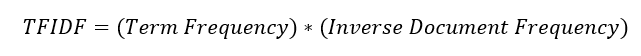

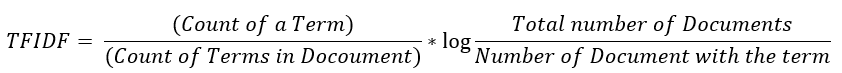

In the simple example below the document tokens are represented only in a raw count (i.e., how many times the token appears), but could be represented using other metrics such as TFIDF. The matrix created is called a [sparse matrix](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html). Exploring the statistics using the describe function allows us to see that the numbers are not 0 and explore some of the values. Each column in the matrix represents a vector for each dimension (e.g., token).

In [29]:
# Let's take the simple example BoW matrix.
df_sample_BoW_matrix = pd.read_excel('./input_data/Sample-BoW-Matrix.xlsx')
print(df_sample_BoW_matrix.shape)
df_sample_BoW_matrix

(4, 4)


,Hypothetical Text,cause,symptom,glaucoma
0,What are the causes of glaucoma?,1,0,1
1,What are the symptoms of glaucoma?,0,1,1
2,What are the causes and symptoms of glaucoma?,1,1,1
3,"Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. Some types of Glaucoma have no symptoms while in others symptoms develop over time. Causes of glaucoma my be due to age, and pressure in the eye.",1,2,3


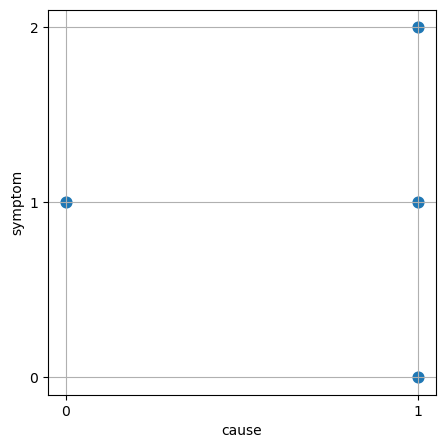

In [30]:
# Let's plot two of our dimensions:
x_values = df_sample_BoW_matrix['cause']
y_values = df_sample_BoW_matrix['symptom']

plt.figure(figsize = [5, 5])
plt.scatter(x = x_values, y = y_values, marker='o', s = 60)

plt.xlabel('cause')
plt.xticks(range(0, max(x_values)+1))
plt.ylabel('symptom')
plt.yticks(range(0, max(y_values)+1))

plt.grid() 
plt.show();
# How would be determine similarity of each of these points to the other?

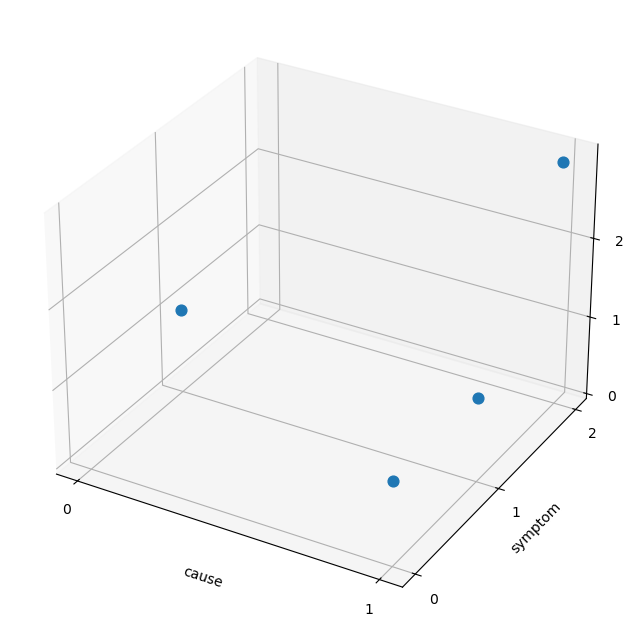

In [31]:
# Let's plot three of our dimensions. As the dimensions become more it is more difficult to visualize.
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

x_values = df_sample_BoW_matrix['cause']
y_values = df_sample_BoW_matrix['symptom']
z_values = df_sample_BoW_matrix['glaucoma']

fig = plt.figure(figsize = [8, 8])
ax = plt.axes(projection="3d")
ax.scatter(xs = x_values, ys = y_values, zs = z_values, 
           zdir = 'z', marker='o', s = 60, depthshade=False)

ax.set_xlabel('cause')
ax.set_xticks(range(0, max(x_values)+1))

ax.set_ylabel('symptom')
ax.set_yticks(range(0, max(y_values)+1))

ax.set_zlabel('glaucoma')
ax.set_zticks(range(0, max(y_values)+1))

plt.show()

The resulting vector matrix can then used for various tasks including but not limited classification, clustering, recommendation, ranking (e.g., based on similarity), question answering, text summarization, and generative (e.g., given a prompt generate text, image, sound, and video). Note that in large language model (LLM) space, some of these tasks are called fine-tunning. 

The code below uses the scikit-learn to create each token vector (i.e., transform the text to numerical format). The standard practice is to use a term-frequency inverse docuemnt-frequence (TFIDF) vectorization. Note that there are other vectorization methods available that can be used such as CountVectorizer.

Documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [50]:
# Let's go back to our data example.
# Creating BOW for the Target DataFrame with selected Vectorizer TFIDF
# Note that CountVectorizer is another vectorization function.
# The below function defines an instance of the vectorizer with its specific parameters.
vectorizer = TfidfVectorizer(lowercase=True, 
                             analyzer='word', 
                             stop_words=stopwords_custom, 
                             ngram_range=(1, 2), 
                             max_df = 0.95, 
                             min_df = 0.01
                            )

In [51]:
# Depending on which word reduction method (e.g., lemmatization, stemming) 
# you will use you need to pick the corresponding column to create the bow array.

# Lemmatized
bow_array = vectorizer.fit_transform(df['norm_text_wlemma']).toarray()

# Stemming
#bow_array = vectorizer.fit_transform(df['norm_text_wstemming']).toarray()

In [52]:
# Returns word vectors.
features = vectorizer.get_feature_names_out()
print(len(features))
features

2918


array(['aaron', 'aaron finch', 'ab', ..., 'zero', 'zimbabwe', 'zone'],
      dtype=object)

In [53]:
# Combining the bow_array with the tokens.
# Note that the total number of ccolumns is the number of tokens or dimensions we have.
# Note that there are some 1-grams (token composed of 1 word) and 2-grams (token composed of 2 words).
df_bow = pd.DataFrame(bow_array, columns = features)
print(df_bow.shape)
df_bow.sample(20)

# Note that the following increases the matrix size: changing the ngram to more than two, increasing the max_df and reducing the min_df,
# Vice-versa is also true.

(2692, 2918)


,aaron,aaron finch,ab,ab de,abandon,ability,able,abroad,absence,abu,...,younis,younis khan,yuan,yuvraj,yuvraj singh,zalmi,zealand,zero,zimbabwe,zone
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.276011,0.0
1546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.31424,0.0,0.000000,0.0
283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
1639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
2453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
1928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0


In [54]:
# Let's exprot this dataframe which we will use in other examples.
df_bow.to_csv(r'.\output_data\df_bow.csv', encoding='utf-8-sig', 
              index = False, 
              header = True)

Few things to note on the above BoW matrix dataframe:
- Each row represents the tokens for the corresponding row and text in the source dataframe.
- The size of the matrix and number of tokens depends on several factors:
    - Size of unstructured data being transformed (e.g., text corpus)
    - TFIDF vectorizer parameters: stopwords, ngrams, max_df and min_df.
- Stemming is faster but the resulting tokens are not necessarily readable.
- Lemmatization is slower but the resulting tokens will be readable.
- Each token in the matrix is a dimension for a record.

The df_bow dataframe can be merged with the df based on index. Note that if the df was filtered and the index was not reset, the df_bow and the df will not align.

Once the df_bow is created the vectors for each token can be used for various tasks including but not limited to classification, clustering, similarity ranking, and other tasks or insights that may require having numeric data such as calculating statistics for specific words. Further notebooks will show how this can be performed.

In [55]:
# This code here combines both the df and df_bow in one dataframe.
df_with_bow = pd.concat([df, df_bow], axis=1)

In [56]:
print(df.shape)
print(df_bow.shape)
print(df_with_bow.shape)

(2692, 6)
(2692, 2918)
(2692, 2924)


# References
[Return to Table of Contents](#Table-of-Contents)

Guide for dealing with text data predictive in Python: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

Lemmatization and Stemming
- https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
- https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/
- https://212digital.medium.com/what-is-lemmatization-and-stemming-in-nlp-e25e142332c4

# NOTEBOOK END